In [1]:
import sys
from os import path
print(path.dirname( path.dirname( path.abspath("__file__") ) ))
sys.path.append(path.dirname( path.dirname( path.abspath("__file__") ) ))

import matplotlib.pyplot as plt 
from Invester.MarketDB import MarketDB


/Volumes/DATA/Code/Daily_Coding/stock_analysis


In [2]:
mk = MarketDB()

/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
df = mk.get_daily_price('NAVER', '2019-01-02')


End Date is Initialized to '2022-08-29'


/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
df['MA20'] = df.close.rolling(window=20).mean()
df['stddev'] = df.close.rolling(window=20).std()
df['upper'] = df.MA20 + (df.stddev * 2)
df['lower'] = df.MA20 - (df.stddev * 2)
df['PB'] = (df.close - df.lower) / (df.upper - df.lower)
df['TP'] = (df.high + df.low + df.close) / 3
df['PMF'] = 0
df['NMF'] = 0


In [5]:
for i in range(len(df.close) - 1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df['MFI10'] = 100 - 100 / (1 + df['MFR'])
df = df[19:]

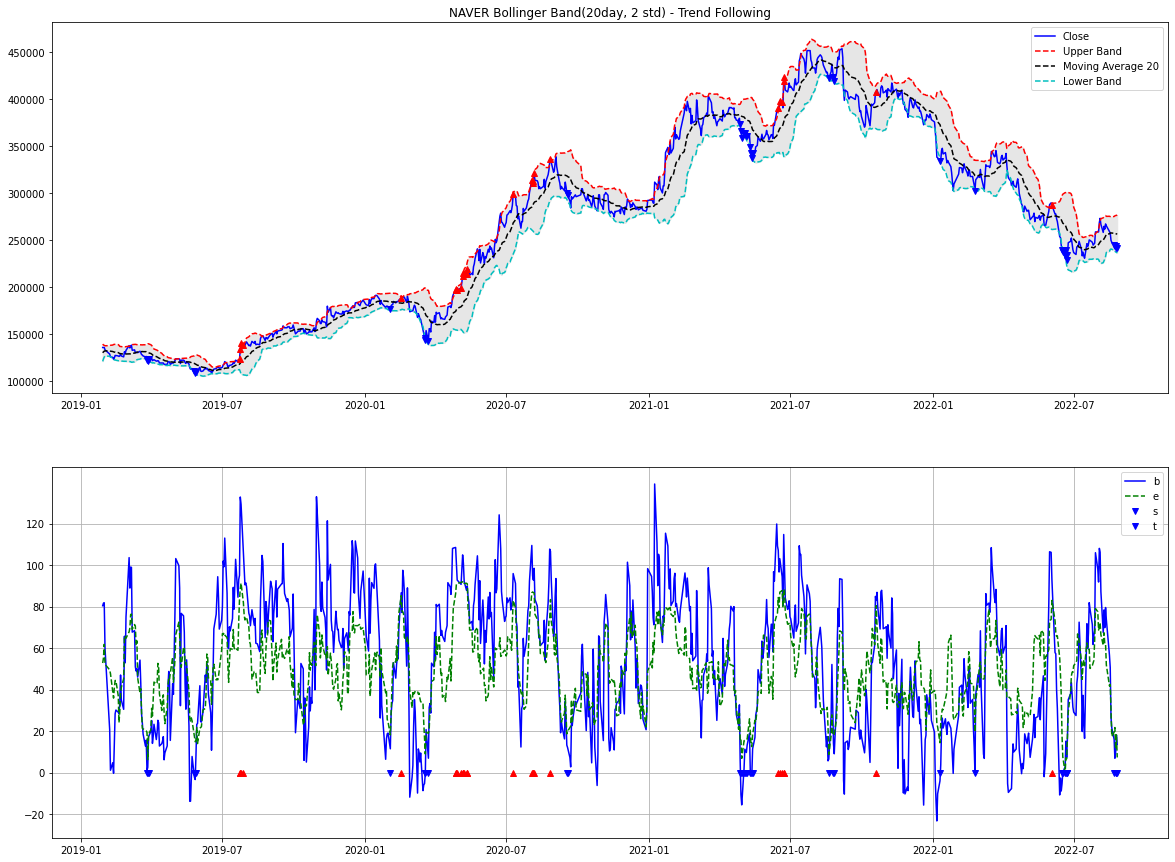

In [8]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20day, 2 std) - Trend Following')
plt.plot(df.index, df.close, color='#0000ff', label='Close')
plt.plot(df.index, df.upper, 'r--', label='Upper Band')
plt.plot(df.index, df.MA20, 'k--', label='Moving Average 20')
plt.plot(df.index, df.lower, 'c--', label='Lower Band')
plt.fill_between(df.index, df.upper, df.lower, color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(df.index, df.PB * 100, 'b', label='%B X 100')
plt.plot(df.index, df.MFI10, 'g--', label='MFI(10 day)')
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10. values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend('best')
plt.show()